In [12]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [14]:

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [15]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [18]:
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



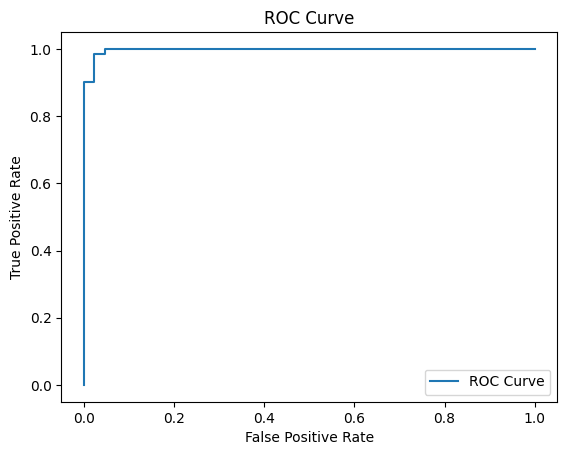

ROC-AUC Score: 0.99737962659679


In [19]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


In [20]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

print("Sigmoid(0) =", sigmoid(0))
print("Sigmoid(2) =", sigmoid(2))


Sigmoid(0) = 0.5
Sigmoid(2) = 0.8807970779778823


In [21]:
threshold = 0.6
y_pred_adjusted = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test, y_pred_adjusted))


[[42  1]
 [ 1 70]]
